*Project 1 Group 5*

The aim of our project is to uncover opportunities within shorthaul rail in Texas. We'll examine relationships between population projections, emissions, travel time, and other related relationships derived from the data. We'll also examine the impact of the COVID-19 pandemic on shorthaul rail in Texas.

What are the growth rates of Austin and Dallas? What are the existing rail lines connecting the two cities? What is the average fuel consumption for the different modes of transporation for a distance of this Length? How will future population growth affect the future emissions?

In [42]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import hvplot.pandas
import requests
import json
import folium
import pprint 

*Data Sources*

In [43]:
#Census API
#c2c15d86f334f8f317c455ad5503dc9b7f4a3077

# census_url = "https://api.census.gov/data/2019/acs/acs1?get=NAME,B01001_001E&for=metropolitan%20statistical%20area/micropolitan%20statistical%20area:*"

# #Track Data
# file = "./Texas_Railroads.geojson"
# track_data = gpd.read_file(file)
# #Read track url into dataframe

# # Create a GeoDataFrame from the track_data
# gdf = gpd.GeoDataFrame(track_data, geometry='geometry')

# #emissions Data for plane and train rides

# read PLANE fuel csv file and create dataframe
planes_fuel_csv = "Resources/planes_fuel_data.csv"
planes_fuel_df = pd.read_csv(planes_fuel_csv, encoding="utf-8")

planes_fuel_df

,Air Carrier Fuel Consumption,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Number of aircraft,"7,185","7,168","6,914","6,740","6,761","6,876","7,077","7,196","7,475","7,628","5,882"
1,Average miles flown per aircraft (thousands),"1,067","1,086","1,118","1,146","1,145","1,146","1,141","1,143","1,143","1,149",899
2,Aircraft-miles (millions) - Domestic,"5,976","6,005","5,956","5,965","5,947","6,046","6,227","6,338","6,609","6,815","4,214"
3,Fuel consumption (million gallons) - Domestic,"11,057","10,828","10,238","10,156","10,293","10,741","11,167","11,340","11,849","12,184","7,233"
4,Aircraft-miles flown per gallon - Domestic,0.54,0.55,0.58,0.59,0.58,0.56,0.56,0.56,0.56,0.56,0.58


In [44]:
# read TRAIN fuel csv file and create dataframe
trains_fuel_csv = "Resources/trains_fuel_data.csv"
trains_fuel_df = pd.read_csv(trains_fuel_csv)

trains_fuel_df

,Amtrak Fuel Consumption and Travel,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Locomotives - number of uses,282,287,485,418,428,423,434,419,431,403,384
1,Train-miles traveled (millions),37,37,38,38,38,38,38,38,38,38,27
2,Train Diesel (million gallons),63,63,63,66,66,62,60,64,65,63,63
3,Average miles traveled per car (thousands),231,228,153,225,229,224,226,225,194,197,141


In [45]:
# read projections csv file and create dataframe
pop_proj_csv = "Resources/Austin_POP_cleaned.csv"
pop_all_df = pd.read_csv(pop_proj_csv)

pop_all_df

,Year,Total Area Population,Annualized Growth Rate
0,2011,1780535,3.70%
1,2012,1834586,3.00%
2,2013,1883315,2.70%
3,2014,1942467,3.10%
4,2015,2002134,3.10%
5,2016,2062016,3.00%
6,2017,2115475,2.60%
7,2018,2165497,2.40%
8,2019,2227083,2.80%
9,2020,2283371,2.50%


In [46]:
# Year 2011 to 2019
austin_pop_df =pop_all_df.iloc[:9]
austin_pop_df


,Year,Total Area Population,Annualized Growth Rate
0,2011,1780535,3.70%
1,2012,1834586,3.00%
2,2013,1883315,2.70%
3,2014,1942467,3.10%
4,2015,2002134,3.10%
5,2016,2062016,3.00%
6,2017,2115475,2.60%
7,2018,2165497,2.40%
8,2019,2227083,2.80%


## Austin Population Growth 

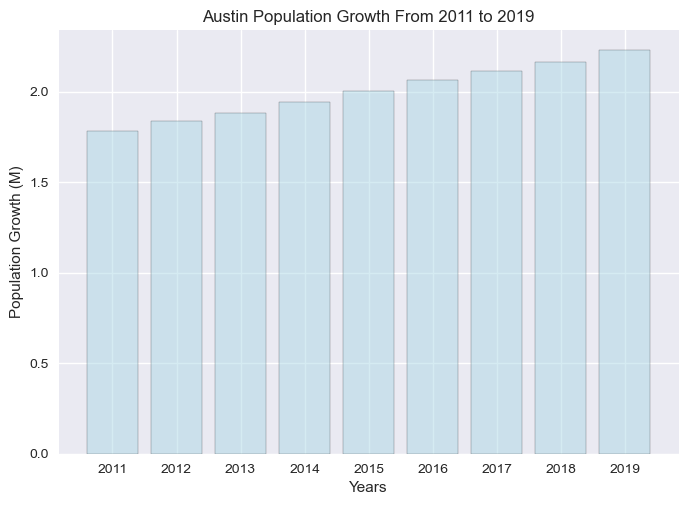

In [47]:
# Bar chart for Austin population growth
year = ['2011','2012','2013','2014','2015','2016','2017', '2018','2019']
x_axis = np.arange(len(year))
total_population = austin_pop_df['Total Area Population'] /10**6
plt.bar(x_axis, total_population, fc="lightblue", ec="black", alpha=0.5, align='center')
plt.title('Austin Population Growth From 2011 to 2019')
plt.xlabel('Years')
plt.ylabel('Population Growth (M)')
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['2011','2012','2013','2014','2015','2016','2017', '2018','2019'])
plt.show()



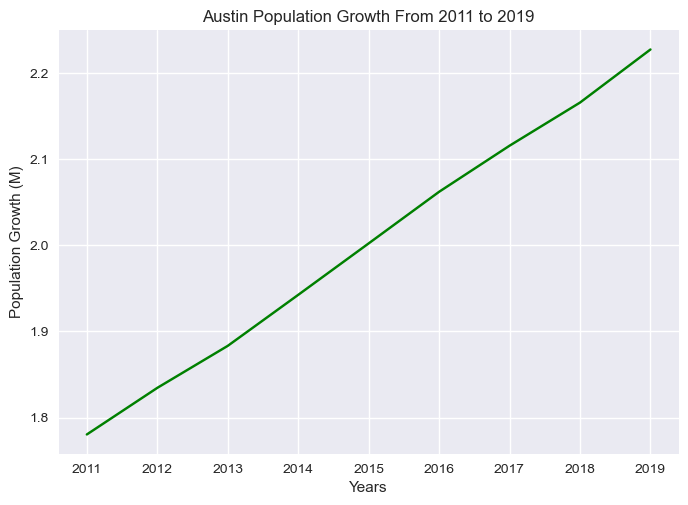

In [48]:
# line graph for Austin population growth
year = ['2011','2012','2013','2014','2015','2016','2017', '2018','2019']
pop_austin = austin_pop_df['Total Area Population'] /10**6
plt.plot(year, total_population, color='g')
plt.title('Austin Population Growth From 2011 to 2019')
plt.xlabel('Years')
plt.ylabel('Population Growth (M)')
plt.show()


## Dallas Population Growth

In [49]:
# read projections csv file and create dataframe
path_csv = "Resources/DFWPOP (1).csv"
dallas_df = pd.read_csv(path_csv)

dallas_df

,Year,Dallas Population
0,2000,5196.188
1,2001,5354.623
2,2002,5476.578
3,2003,5582.033
4,2004,5689.982
5,2005,5816.407
6,2006,5999.411
7,2007,6156.652
8,2008,6301.085
9,2009,6447.615


In [50]:
# Year 2011 to 2019
dallas_pop_df =dallas_df.iloc[11:20]
dallas_pop_df


,Year,Dallas Population
11,2011,6510.550
12,2012,6644.519
13,2013,6753.804
14,2014,6889.603
15,2015,7042.322
16,2016,7195.475
17,2017,7337.707
18,2018,7457.586
19,2019,7574.390


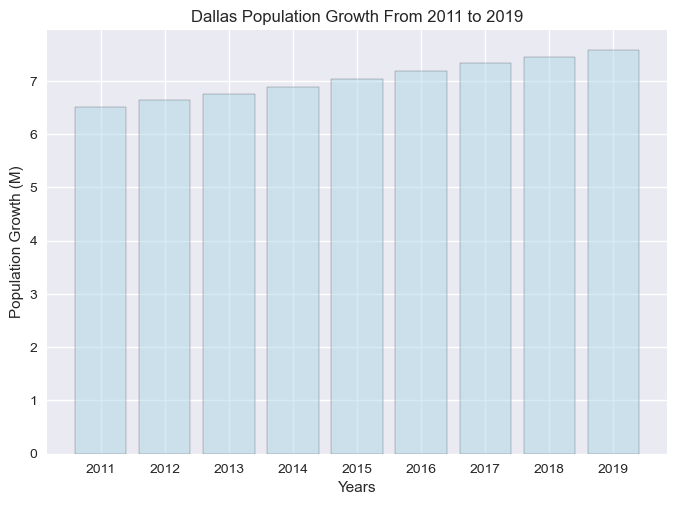

In [51]:
# Bar chart for Dallas population growth
year = ['2011','2012','2013','2014','2015','2016','2017', '2018','2019']
x_axis = np.arange(len(year))
total_population = dallas_pop_df['Dallas Population'] /10**3
plt.bar(x_axis, total_population, fc="lightblue", ec="black", alpha=0.5, align='center')
plt.title('Dallas Population Growth From 2011 to 2019')
plt.xlabel('Years')
plt.ylabel('Population Growth (M)')
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['2011','2012','2013','2014','2015','2016','2017', '2018','2019'])
plt.show()


In [52]:
# #Filter out irrelevant tracks
# gdf = gdf[(gdf["GID"] == 8359) 
#           | (gdf["GID"] == 11743) 
#           | (gdf["GID"] == 8263) 
#           | (gdf["GID"] == 10209) 
#           | (gdf["GID"] == 12792) 
#           | (gdf["GID"] == 3255)
#           | (gdf["GID"] == 11098) 
#           | (gdf["GID"] == 11714) 
#           | (gdf["GID"] == 12439) 
#           | (gdf["GID"] == 12741)
#           | (gdf["GID"] == 13101) 
#           | (gdf["GID"] == 5689) 
#           | (gdf["GID"] == 10811)
#           | (gdf["GID"] == 12063)
#           | (gdf["GID"] == 12792)
#           | (gdf["GID"] == 8629)
#           | (gdf["GID"] == 12511)
#           | (gdf["GID"] == 10922)
#           | (gdf["GID"] == 10814)
#           ]

# #Create Map of Texas
# track_map = folium.Map(location=[35,-95], zoom_start=7, tiles="Stamen Terrain")
# folium.GeoJson(
#     gdf
# ).add_to(track_map)

# #Add markers to map indicating Dallas Love Field and Austin Bergstrom International Airport
# #Dallas Fort Worth Field
# folium.vector_layers.CircleMarker(location=[32.897480, -97.040443], radius=5,popup= "Dallas Airport", color='red', fill=True, fill_color='red').add_to(track_map)
# #Austin Bergstrom International Airport
# folium.vector_layers.CircleMarker(location=[30.1944444444, -97.67], radius=5,popup= "Austin Airport", color='red', fill=True, fill_color='red').add_to(track_map)
# #Houston Airport
# folium.vector_layers.CircleMarker(location=[29.9855555556, -95.3422222222], popup= "Houston Airport", radius=5, color='red', fill=True, fill_color='red').add_to(track_map)

# #Display the Map

# display(track_map)


How are the cities of Austin and Dallas growing?


In [53]:
#Census Population projections
###What are future growth projections for Austin and Dallas
#Lin Reg or Map
#

What are the existing rail lines between the two cities?
Humdata
Plot a few lines on a map


How much fuel is consumed to fly or take the Train from Dallas to Austin?


In [54]:
#Fuel consumption of a plane vs train for x miles

#Bar chart comparing the two - fuel consumed
#Bar Chart comparing the two - CO2 emissions


How will population growth affect future fuel and CO2 emissions?
